# EJERCICIO 9
La segmentación de imágenes digitales en regiones con apariencia de piel ha sido utilizado como un paso de pre-procesamiento en varias aplicaciones de detección y seguimiento de caras humanas y personas.
Con el fin de generar un detector de piel/no-piel, se realizó un muestreo de fotografías digitales de caras de personas de diversas edades, géneros y razas al mismo tiempo que se hizo otro muestreo de imágenes que no incluyeran personas. El muestreo consistió en obtener mediciones del color de pixels de cada una de las clases requeridas (piel/no-piel). La medición del color se realizó en el espacio de colores RGB, obteniendo un total de 51444 muestras de las cuales 14654 son muestras de piel mientras que las restantes 36790 son muestras de otras texturas. Cada muestra está representada por el nivel de azul (B), verde (G) y rojo (R), siendo el nivel un valor entero entre 0 (mínimo nivel posible) y 255 (máximo nivel posible).
Entrene una red neuronal artificial para tratar de predecir a partir del color de un pixel dado si se trata o no de piel humana. Utilice todas las muestras para el entrenamiento.
Detalle la arquitectura empleada y los valores de los parámetros usados. Documente todos los intentos realizados. Informe los mejores resultados obtenidos. Utilice la imagen suministrada junto con el enunciado para validar la efectividad del clasificador.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import pylab
import mpld3
%matplotlib inline
mpld3.enable_notebook()
from cperceptron import Perceptron
from cbackpropagation import ANN #, Identidad, Sigmoide
import patrones as magia
def progreso(ann, X, T, y=None, n=-1, E=None):
    if n % 20 == 0:
        print("Pasos: {0} - Error: {1:.32f}".format(n, E)) 
def progresoPerceptron(perceptron, X, T, n):
    y = perceptron.evaluar(X)
    incorrectas = (T != y).sum()
    print("Pasos: {0}\tIncorrectas: {1}\n".format(n, incorrectas))

ImportError: dlopen(./cperceptron.so, 2): Symbol not found: _PyBytes_Type
  Referenced from: ./cperceptron.so
  Expected in: dynamic lookup


In [ ]:
piel = np.load('piel.npy')

color = piel[:, :-1]
tipos = piel[:, -1]
# tipos == 1 --> Piel
# tipos == 2 --> No Piel

In [ ]:
#Armo Patrones
clases, patronesEnt, patronesTest = magia.generar_patrones(
    magia.escalar(color),tipos,90)
X, T = magia.armar_patrones_y_salida_esperada(clases,patronesEnt)
Xtest, Ttest = magia.armar_patrones_y_salida_esperada(clases,patronesTest)

## Prueba con Perceptron

In [2]:
# Esto es para poder usar Cython y que sea mas rapido
TT = T[:,0].copy(order='C')
TT = TT.astype(np.int8)

p1 = Perceptron(X.shape[1])
p1.reiniciar()
I1 = p1.entrenar(X, TT, max_pasos=10000, callback=progresoPerceptron, frecuencia_callback=5000)
print("Pasos:{0}".format(I1))

NameError: name 'T' is not defined

In [3]:
print("Errores:{0} de {1}".format((p1.evaluar(Xtest) != Ttest[:,0]).sum(),Ttest.shape[0]))

NameError: name 'p1' is not defined

## Prueba con BackPropagation

In [26]:
# Crea la red neuronal
ocultas = 8 #2,5,10(0.13),20(0.018),100(0.014),8(0.017)
entradas = X.shape[1]
salidas = T.shape[1]
ann = ANN(entradas, ocultas, salidas)
ann.reiniciar()

In [27]:
#Entreno
E, n = ann.entrenar_rprop(X, T, min_error=0, max_pasos=1000, callback=progreso, frecuencia_callback=100)
print("\nRed entrenada en {0} pasos con un error de {1:.32f}".format(n, E))

Pasos: 100 - Error: 0.05831602923272585781155896711425
Pasos: 200 - Error: 0.04265683001087838127629581208566
Pasos: 300 - Error: 0.04102138503946545916578614310311
Pasos: 400 - Error: 0.04054351053368956958600222151290
Pasos: 500 - Error: 0.04000021637006364455535489810245
Pasos: 600 - Error: 0.03886974452797508500223599980927
Pasos: 700 - Error: 0.03097102510269647557272776339232
Pasos: 800 - Error: 0.02169834866749519725059869301731
Pasos: 900 - Error: 0.01867952664079959926302088035754
Pasos: 1000 - Error: 0.01747518636590704790845229865681

Red entrenada en 1000 pasos con un error de 0.01747518636590704790845229865681


In [67]:
ann.evaluar(Xtest)

array([[ 0.92803183,  0.07457597],
       [ 0.94929832,  0.05059027],
       [ 0.96035076,  0.04364805],
       ..., 
       [ 0.01317542,  0.98372727],
       [-0.01503554,  1.01405521],
       [ 0.00985367,  0.94859684]])

In [66]:
Ttest

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       ..., 
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.]])

In [59]:
#Evaluo
Y = (ann.evaluar(Xtest) >= 0.89)
magia.matriz_de_confusion(Ttest,Y) 

(array([[ 1212.,     0.,   254.],
        [    8.,  3425.,   246.]]), [array([1, 0]), array([0, 1])])

In [1]:
# Para probar el clasificador
imagen = np.load('imagen.npy')
pylab.imshow(imagen)
# La imagen ahora en una matriz donde en cada fila está el color de cada pixel.
imagen_lineal = imagen.reshape(-1, 3)[:, ::-1]
foto = imagen_lineal.copy(order='C').astype(np.float64)

NameError: name 'np' is not defined

In [70]:
ann.evaluar(foto)

3.6026327954097228

In [55]:
#Evaluo
Y = (ann.evaluar(foto) >= 2).astype(np.int8)

In [56]:
fotoClasificada = Y[:,1].reshape(imagen.shape[:-1]).astype(np.int8)

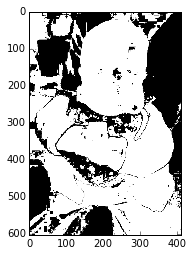

In [57]:
# Vuelve a darla las dimensiones de la imagen al resultado de la clasificación.
#clasificacion = Y.reshape(imagen.shape[:-1])
pylab.gray()
pylab.imshow(fotoClasificada)
pylab.show()

#LO BLANCO ES PIEL

In [18]:
ann.guardar('hitler')